# Digit image classification

<a href="https://colab.research.google.com/github/cpraveen/ml/blob/master/Examples/MNIST_classification/train_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
%config InlineBackend.figure_format = 'svg'
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [47]:
# Set seeds for reproducibilty
def seed_random_number(seed):
    # see https://stackoverflow.com/a/52897216
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)

In [48]:
random_seed = 1
seed_random_number(random_seed)

In [49]:

# Data set:
# BnW 28x28 pixel handwritten images of digits
# 60000 training samples, 10000 test samples
try:
    # Import data locally
    train_images = np.load('Data/train_data.npy')
    train_labels = np.load('Data/train_data_label.npy')
    test_images  = np.load('Data/test_data.npy')
    test_labels  = np.load('Data/test_data_labels.npy')
except:
    # Importing data from MNIST server
    mnist = keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Train data size = ', train_images.shape)
print('Test  data size = ', test_images.shape)

Train data size =  (60000, 28, 28)
Test  data size =  (10000, 28, 28)


The data consists of pairs $(x,d)$ where $x$ is a $28 \times 28$ matrix and the associated label $d$ is an integer between 0 to 9.

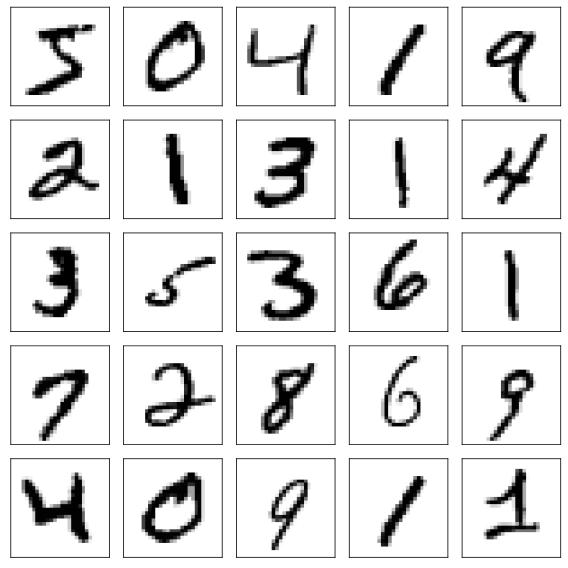

In [50]:
# Visualize a few of the images
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()    

The neural network takes as input an image $x$ which is a $28 \times 28$ matrix, and outputs a vector $y$ with 10 components
$$
y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_9 \end{bmatrix} = N(x)
$$
such that
$$
0 < y_j < 1, \qquad \sum_{j=0}^9 y_j = 1
$$
This is achieved by using the softmax activation function in the last layer. The number $y_j$ gives the probability that the input $x$ represents the digit $j$.

For each image $x$, the label can be represented as a probability
$$
t(x) = \begin{bmatrix}
t_0 \\ t_1 \\ \vdots \\ t_9 \end{bmatrix}
$$
This is equal to one of the canonical unit vectors, e.g., if the label of $x$ is 5, then the label is one-hot encoded to the true probability
$$
t(x) = 
\begin{bmatrix}
t_0 \\ t_1 \\ t_2 \\ t_3 \\ t_4 \\ t_5 \\ t_6 \\ t_7 \\ t_8 \\ t_9 \end{bmatrix}
=
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$
If the neural network predicts the probability $y = y(x)$, then the cross entropy is
$$
-\sum_{j=0}^9 t_j(x) \ln y_j(x)
$$
If we have $N$ images in the training set, the loss function is the total cross entropy
$$
L = - \frac{1}{N} \sum_{i=0}^N \sum_{j=0}^9 t_j(x_i) \ln y_j(x_i)
$$

Some discussion on cross entropy, see

https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e

In [51]:
# Function describing network architecture
def create_model():
  model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(10, 
                               activation=tf.nn.relu, 
                               use_bias=True, 
                               kernel_initializer='RandomNormal', 
                               bias_initializer='RandomNormal'),
            keras.layers.Dense(10, 
                               activation=tf.nn.relu, 
                               use_bias=True, 
                               kernel_initializer='RandomNormal', 
                               bias_initializer='RandomNormal'),
            keras.layers.Dense(10, 
                               activation=tf.nn.relu, 
                               use_bias=True, 
                               kernel_initializer='RandomNormal', 
                               bias_initializer='RandomNormal'),
            keras.layers.Dense(10, 
                               activation=tf.nn.softmax, 
                               use_bias=True, 
                               kernel_initializer='RandomNormal', 
                               bias_initializer='RandomNormal')
  ])
  
  model.compile(optimizer=tf.optimizers.Adam(), 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [52]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Training
model.fit(train_images, 
          train_labels, 
          epochs=10, 
          verbose=2, 
          batch_size=32, 
          shuffle=True, 
          validation_split=0.2,
          initial_epoch=0);

Epoch 1/10
1500/1500 - 1s - loss: 0.5681 - accuracy: 0.8169 - val_loss: 0.3468 - val_accuracy: 0.8967 - 884ms/epoch - 589us/step
Epoch 2/10
1500/1500 - 1s - loss: 0.3254 - accuracy: 0.9043 - val_loss: 0.2901 - val_accuracy: 0.9136 - 690ms/epoch - 460us/step
Epoch 3/10
1500/1500 - 1s - loss: 0.2846 - accuracy: 0.9164 - val_loss: 0.2864 - val_accuracy: 0.9191 - 689ms/epoch - 459us/step
Epoch 4/10
1500/1500 - 1s - loss: 0.2615 - accuracy: 0.9225 - val_loss: 0.2543 - val_accuracy: 0.9268 - 687ms/epoch - 458us/step
Epoch 5/10
1500/1500 - 1s - loss: 0.2464 - accuracy: 0.9275 - val_loss: 0.2400 - val_accuracy: 0.9288 - 688ms/epoch - 459us/step
Epoch 6/10
1500/1500 - 1s - loss: 0.2349 - accuracy: 0.9301 - val_loss: 0.2311 - val_accuracy: 0.9333 - 688ms/epoch - 459us/step
Epoch 7/10
1500/1500 - 1s - loss: 0.2278 - accuracy: 0.9328 - val_loss: 0.2263 - val_accuracy: 0.9342 - 688ms/epoch - 458us/step
Epoch 8/10
1500/1500 - 1s - loss: 0.2188 - accuracy: 0.9351 - val_loss: 0.2329 - val_accuracy: 0.

In [54]:
# Test accuracy of trained model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 360us/step - loss: 0.2585 - accuracy: 0.9265
Test accuracy: 0.9265000224113464


In [55]:
# Plot predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False); plt.xticks([]); plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{:2.0f}% ({})".format(100*np.max(predictions_array),
                                    predicted_label),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False); plt.xticks([0,1,2,3,4,5,6,7,8,9]); plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [56]:
predictions = model.predict(test_images)  

313/313 [==============================] - 0s 308us/step


Let us examine how the network classifies an image in the test set, e.g., j = 0'the image.

Probabilities for test image   =  0
  0   0.00000
  1   0.00028
  2   0.00039
  3   0.00093
  4   0.00000
  5   0.00000
  6   0.00000
  7   0.99774
  8   0.00000
  9   0.00065
Max Probability =  0.9977423
Digit           =  7


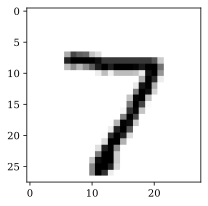

In [57]:
j = 0
print('Predicted probability for test image  = ', j)
for i,p in enumerate(predictions[j]):
    print('%3d %9.5f' % (i,p))
print('Max Probability = ',predictions[j].max())
print('Digit           = ', np.argmax(predictions[j]))
plt.figure(figsize=(3,3))
plt.imshow(test_images[j], cmap=plt.cm.binary);

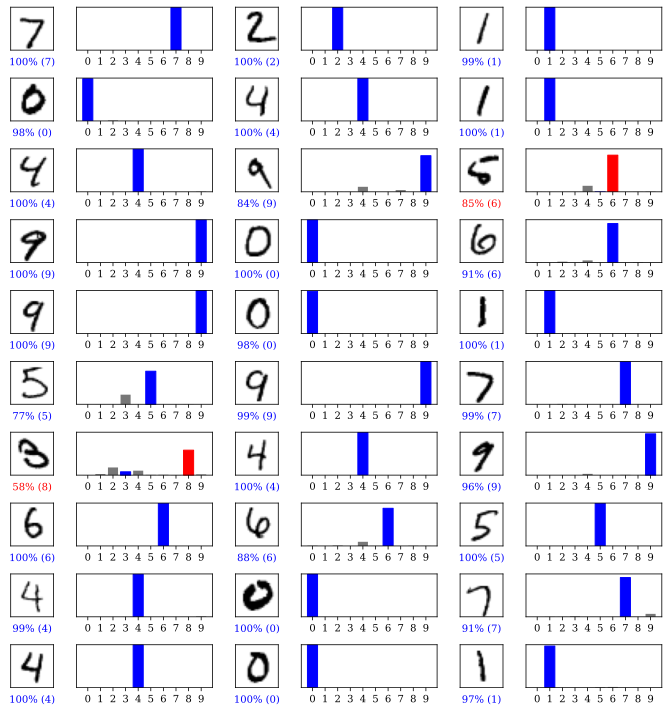

In [58]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
#plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.figure(figsize=(10,10))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

## Extensions

Typically, CNNs are used for image based problems. In this example, a multiple layer perceptron (MLP) is being used instead, which would require flattening the 28x28 input before feeding it to the network. You could mention this in the description. As an extension of this tutorial, one could try replacing this network by a CNN based network, which has a few convolutional layers in the beginning, whose output is flattened and sent through a couple of dense layers. This will help in two ways: a) the number of trainable parameters will be reduced significantly, b) spatial inductive bias is taken into consideration (https://analyticsindiamag.com/top-5-inductive-biases-in-deep-learning-models/) 